In [16]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
from astropy.table import Table, join
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm

In [204]:
galah_dr3 = Table.read('../../../GALAH_DR3/catalogs/GALAH_DR3_all_joined_v2.fits')
galah_dr3['tmass_id'] = galah_dr3['star_id_1']
galah_dr4 = Table.read('../../catalogs/galah_dr4_allstar_230531.fits')

In [271]:
def plot_2d_histogram(data, name):
    """
    Plots a 2D histogram of 'teff' vs. 'logg' in one panel
    and 'fe_h' vs. 'mg_fe' in another panel using input 'data'
    as an astropy.table.Table.

    Parameters:
        data (astropy.table.Table): Input data table with columns 'teff',
            'logg', 'fe_h', and 'mg_fe'.

    Returns:
        None
    """
    
    finite_galah = (
        (galah_dr4['flag_mg_fe'] == 0) &
        np.isfinite(galah_dr4['r_med']) &
        np.isfinite(galah_dr4['bp_rp'])
    )
    
    finite_bprp_g = np.isfinite(data['bp_rp']) & np.isfinite(data['phot_g_mean_mag'])
    finite_teff_logg  = np.isfinite(data['teff']) & np.isfinite(data['logg'])
    finite_fe_h_mg_fe = np.isfinite(data['fe_h']) & np.isfinite(data['mg_fe'])

    # Extract the required columns from the data table
    
    bprp = data['bp_rp'][finite_bprp_g]
    gmag = data['phot_g_mean_mag'][finite_bprp_g] - 5*np.log10(data['r_med'][finite_bprp_g]/10.)
    teff = data['teff'][finite_teff_logg]
    logg = data['logg'][finite_teff_logg]
    fe_h = data['fe_h'][finite_fe_h_mg_fe]
    mg_fe = data['mg_fe'][finite_fe_h_mg_fe]

    # Create a figure with two subplots
    fig, gs = plt.subplots(1, 3, figsize=(12, 4))

    ax = gs[0]
    
    # Plot 'teff' vs. 'logg' in the first subplot
    g0 = ax.hist2d(
        galah_dr4['bp_rp'][finite_galah],
        galah_dr4['phot_g_mean_mag'][finite_galah] - 5*np.log10(galah_dr4['r_med'][finite_galah]/10.),
        bins = 200, cmin = 1, cmap = 'Greys', zorder=1, norm=LogNorm()
    )
    s1 = ax.scatter(bprp, gmag, s=5, alpha=0.75, zorder=2, c='C1')
    ax.set_xlabel(r'$G_{BP} - G_{RP}~/~\mathrm{mag}$',fontsize=15)
    ax.set_ylabel(r'$M_G~/~\mathrm{mag}$',fontsize=15)
    ax.set_title(str(len(data['teff']))+' '+name)
    ax.set_xlim(0,3)
    ax.set_ylim(12,-7)

    ax = gs[1]
    
    # Plot 'teff' vs. 'logg' in the first subplot
    g0 = ax.hist2d(
        galah_dr4['teff'][finite_galah],
        galah_dr4['logg'][finite_galah],
        bins = 100, cmin = 1, cmap = 'Greys', zorder=1, norm=LogNorm()
    )
    s1 = ax.scatter(teff, logg, s=5, alpha=0.75, zorder=2, c='C1')
    ax.set_xlabel(r'$T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
    ax.set_ylabel(r'$\log (g~/~{cm\,s^{-2}})$',fontsize=15)
    ax.set_title(str(len(data['teff']))+' '+name)
    ax.set_xlim(8000,3000)
    ax.set_ylim(5.5,-0.5)

    ax = gs[2]
    
    # Plot 'fe_h' vs. 'mg_fe' in the second subplot
    g0 = ax.hist2d(
        galah_dr4['fe_h'][finite_galah],
        galah_dr4['mg_fe'][finite_galah],
        bins = 100, cmin = 1, cmap = 'Greys', zorder=1, norm=LogNorm(),
        label = 'GALAH DR4'
    )
    s2 = ax.scatter(fe_h, mg_fe, s=5, alpha=0.75, c='C1')
    ax.set_xlabel('[Fe/H]',fontsize=15)
    ax.set_ylabel('[Mg/Fe]',fontsize=15)
    ax.set_title(str(len(data['teff']))+' '+name)

    # Adjust limits
    ax.set_xlim(-2.5,0.75)
    ax.set_ylim(-0.65,0.85)

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plot
    return(fig)
    

# GALAH DR4 RR Lyrae identified in $Gaia$ DR3

In [28]:
gaia_dr3_rrlyrae = Table.read('cross_matches/galah_x_gaiadr3.vari_rrlyrae-result.fits')
gaia_dr3_rrlyrae = join(gaia_dr3_rrlyrae, galah_dr4, keys = 'tmass_id', metadata_conflicts='silent')

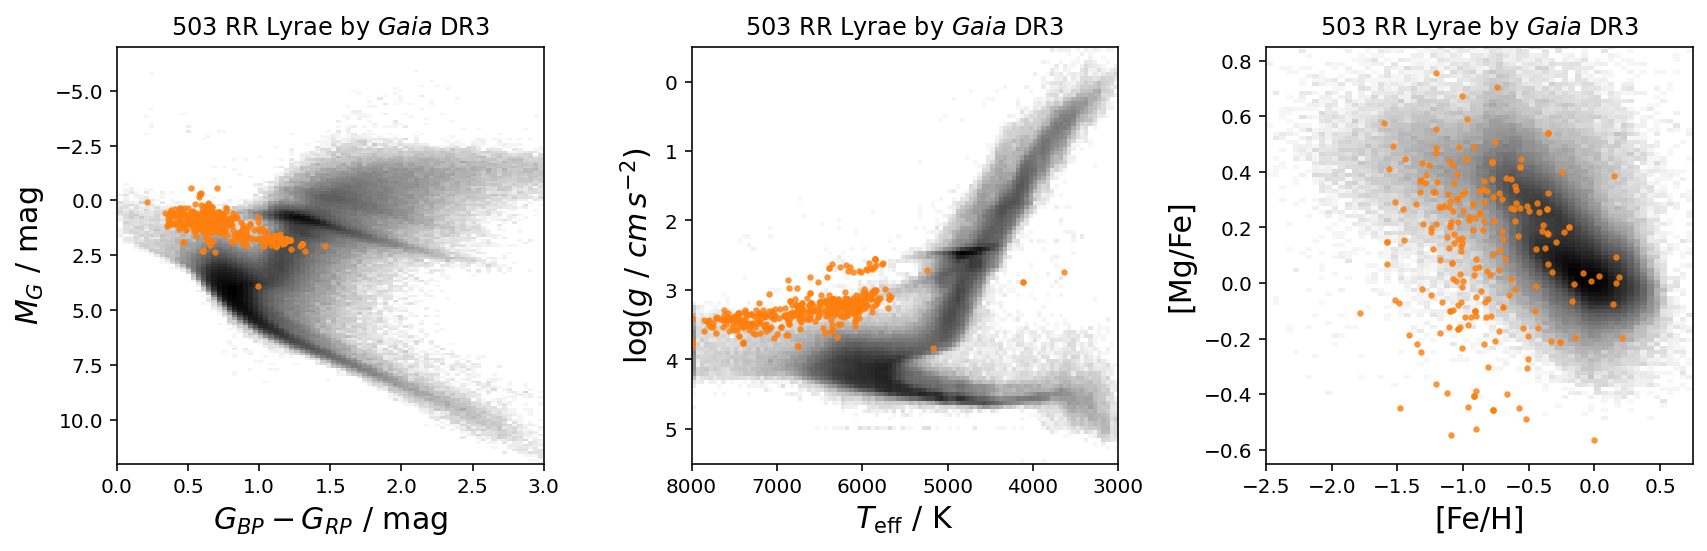

In [277]:
fig = plot_2d_histogram(gaia_dr3_rrlyrae, name = 'RR Lyrae by $Gaia$ DR3')
plt.savefig('figures/galah_dr4_rrlyrae.png',dpi=100,bbox_inches='tight')

# GALAH DR4 Cepheids identified in $Gaia$ DR3

In [140]:
gaia_dr3_cepheids = Table.read('cross_matches/galah_x_gaiadr3.vari_cepheids-result.fits')
gaia_dr3_cepheids = join(gaia_dr3_cepheids, galah_dr4, keys = 'tmass_id', metadata_conflicts='silent')

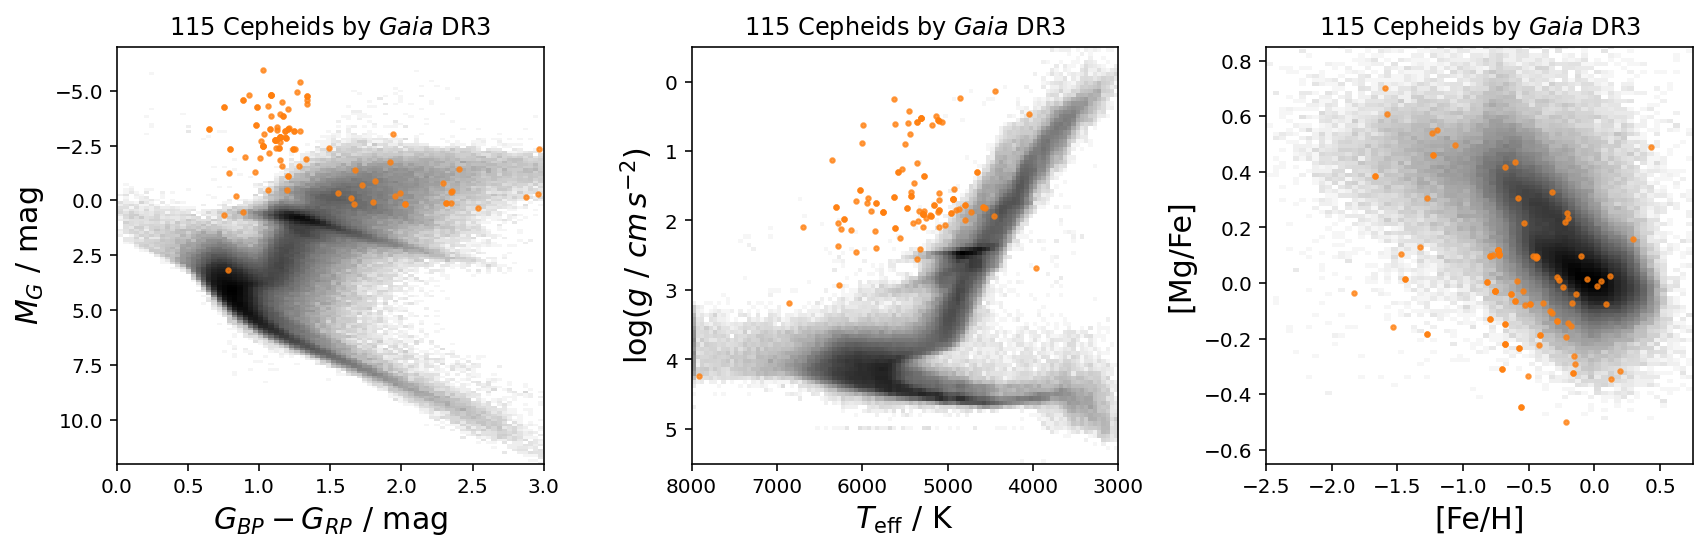

In [278]:
fig = plot_2d_histogram(gaia_dr3_cepheids, name = 'Cepheids by $Gaia$ DR3')
plt.savefig('figures/galah_dr4_cepheids.png',dpi=100,bbox_inches='tight')

# GALAH DR4 stars with R_HK indices

In [205]:
BoroSaikia_R_HK = Table.read('cross_matches/GALAH_DR4_ids_BoroSaikia2018_AandA_616_108.fits')
BoroSaikia_R_HK_dr3 = join(BoroSaikia_R_HK, galah_dr3, keys = 'tmass_id', metadata_conflicts='silent')
BoroSaikia_R_HK = join(BoroSaikia_R_HK, galah_dr4, keys = 'tmass_id', metadata_conflicts='silent')

In [206]:
GomesDaSilva_R_HK = Table.read('cross_matches/GALAH_DR4_ids_GomesDaSilva_2021_AandA_646_77.fits')
GomesDaSilva_R_HK_dr3 = join(GomesDaSilva_R_HK, galah_dr3, keys = 'tmass_id', metadata_conflicts='silent')
GomesDaSilva_R_HK = join(GomesDaSilva_R_HK, galah_dr4, keys = 'tmass_id', metadata_conflicts='silent')
GomesDaSilva_R_HK['logg'] = GomesDaSilva_R_HK['logg_2']

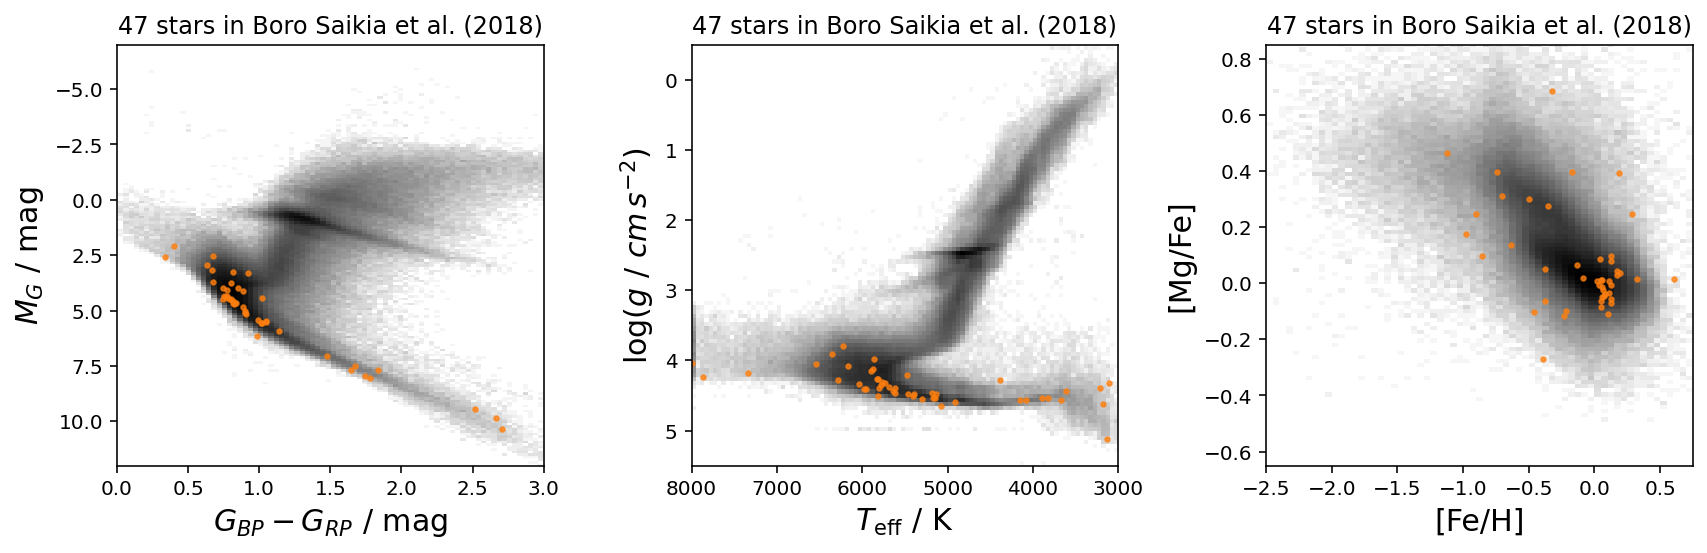

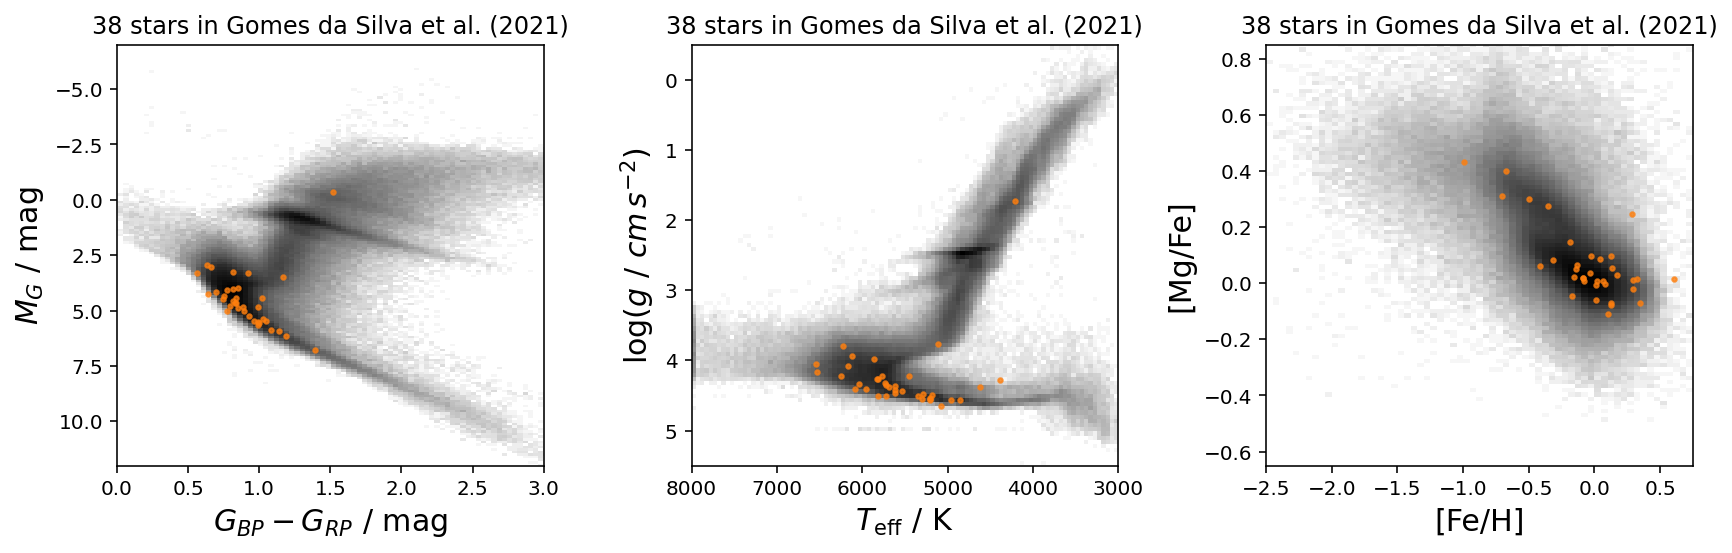

In [207]:
plot_2d_histogram(BoroSaikia_R_HK, name = 'stars in Boro Saikia et al. (2018)')
plot_2d_histogram(GomesDaSilva_R_HK, name = 'stars in Gomes da Silva et al. (2021)')

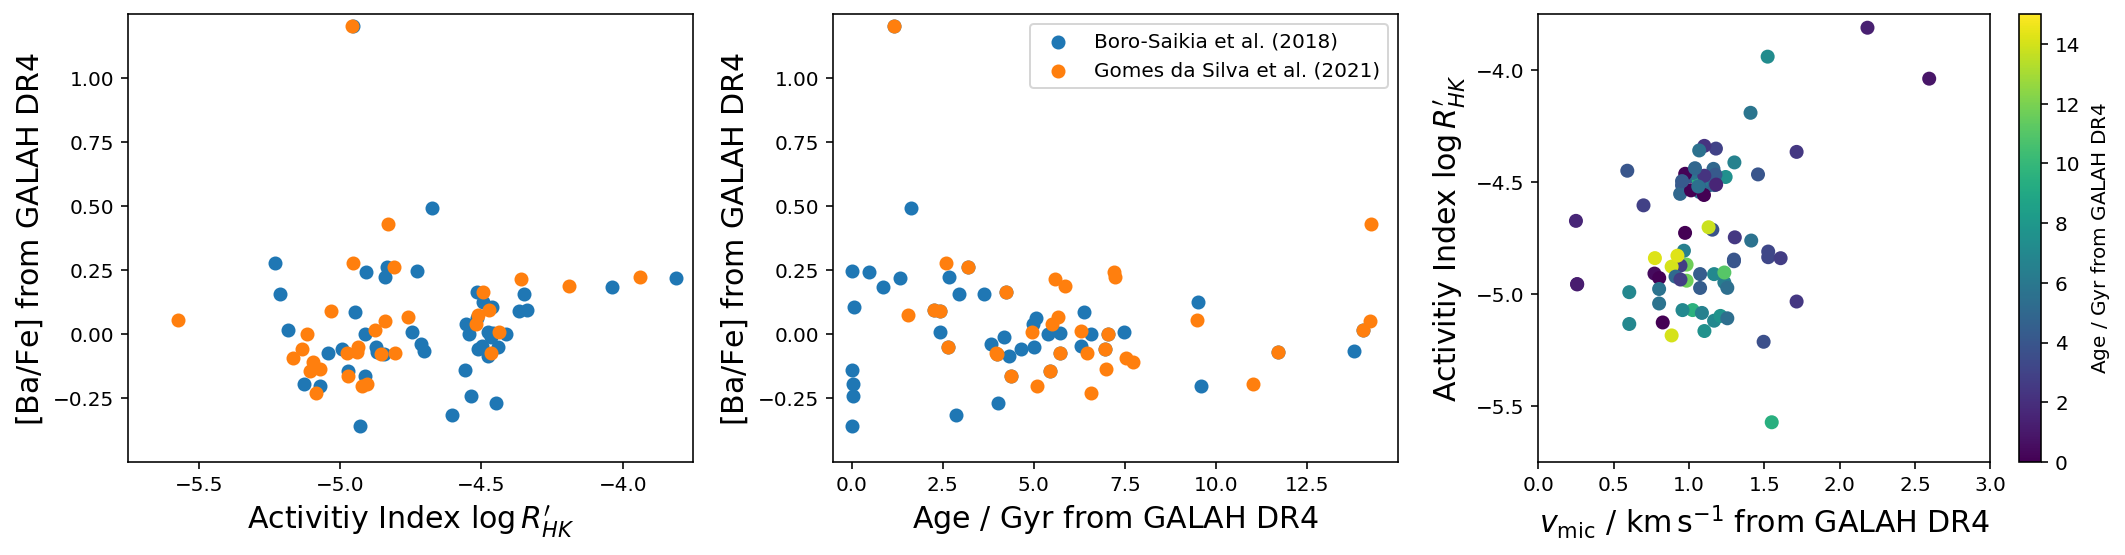

In [267]:
f, gs = plt.subplots(1,3,figsize=(15,4))

ax = gs[0]
ax.scatter(
    (BoroSaikia_R_HK['logRpHK']),
    BoroSaikia_R_HK['ba_fe'],
    label = 'Boro-Saikia et al. (2018)'
)
ax.scatter(
    GomesDaSilva_R_HK['logRHKmed'],
    GomesDaSilva_R_HK['ba_fe'],
    label = 'Gomes da Silva et al. (2021)'
)
ax.set_xticks([-5.5,-5.0,-4.5,-4.0])
ax.set_xlim(-5.75,-3.75)
ax.set_yticks([-0.25,0.0,0.25,0.5,0.75,1.0])
ax.set_ylim(-0.5,1.25)
ax.set_xlabel(r'Activitiy Index $\log R^\prime_{HK}$',fontsize=15)
ax.set_ylabel(r'$\mathrm{[Ba/Fe]}$ from GALAH DR4',fontsize=15)
# ax.legend()

ax = gs[1]
ax.scatter(
    (BoroSaikia_R_HK['age']),
    BoroSaikia_R_HK['ba_fe'],
    label = 'Boro-Saikia et al. (2018)'
)
ax.scatter(
    GomesDaSilva_R_HK['age'],
    GomesDaSilva_R_HK['ba_fe'],
    label = 'Gomes da Silva et al. (2021)'
)
ax.set_xticks([0,2.5,5,7.5,10,12.5])
ax.set_yticks([-0.25,0.0,0.25,0.5,0.75,1.0])
ax.set_ylim(-0.5,1.25)
ax.set_xlim(-0.5,15.0)
ax.set_ylabel(r'$\mathrm{[Ba/Fe]}$ from GALAH DR4',fontsize=15)
ax.set_xlabel(r'$\mathrm{Age}~/~\mathrm{Gyr}$ from GALAH DR4',fontsize=15)
ax.legend(loc='upper right')

ax = gs[2]
s = ax.scatter(
    (BoroSaikia_R_HK['vmic']),
    BoroSaikia_R_HK['logRpHK'],
    c = BoroSaikia_R_HK['age'],
    vmin = 0, vmax = 15,
    label = 'Boro-Saikia et al. (2018)'
)
ax.scatter(
    GomesDaSilva_R_HK['vmic'],
    GomesDaSilva_R_HK['logRHKmed'],
    c = GomesDaSilva_R_HK['age'],
    vmin = 0, vmax = 15,
    label = 'Gomes da Silva et al. (2021)'
)
ax.set_xlim(0,3)
ax.set_yticks([-5.5,-5.0,-4.5,-4.0])
ax.set_ylim(-5.75,-3.75)
ax.set_xlabel(r'$v_\mathrm{mic}~/~\mathrm{km\,s^{-1}}$ from GALAH DR4',fontsize=15)
ax.set_ylabel(r'Activitiy Index $\log R^\prime_{HK}$',fontsize=15)
cbar = plt.colorbar(s, ax=ax)
cbar.set_label(r'$\mathrm{Age}~/~\mathrm{Gyr}$ from GALAH DR4')

# ax.set_xlabel(r'$\mathrm{Age}~/~\mathrm{Gyr}$ from GALAH DR4',fontsize=15)

plt.tight_layout()
plt.savefig('figures/rhk_galah_dr4.pdf',bbox_inches='tight',dpi=200)

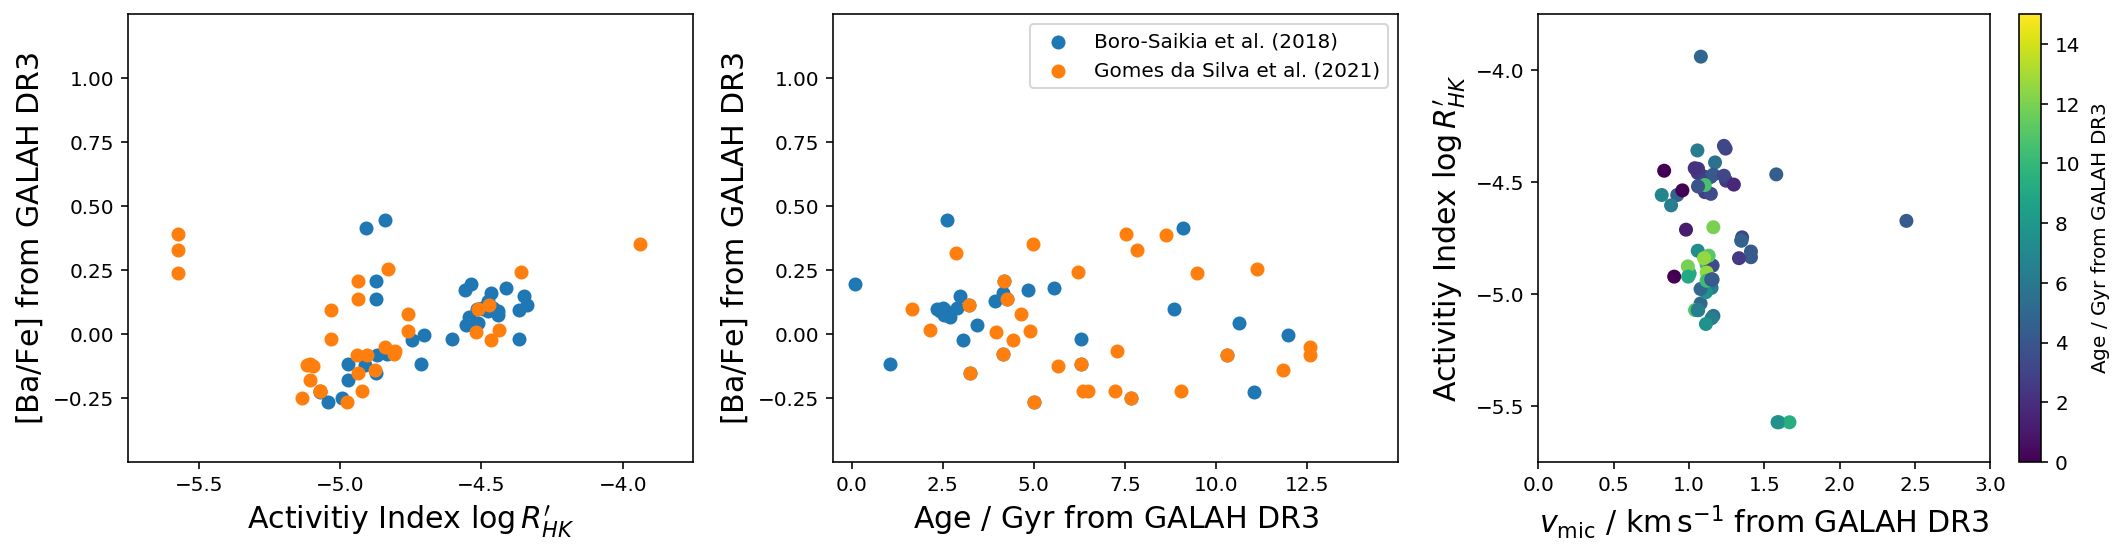

In [266]:
f, gs = plt.subplots(1,3,figsize=(15,4))

ax = gs[0]
ax.scatter(
    (BoroSaikia_R_HK_dr3['logRpHK']),
    BoroSaikia_R_HK_dr3['Ba_fe'],
    label = 'Boro-Saikia et al. (2018)'
)
ax.scatter(
    GomesDaSilva_R_HK_dr3['logRHKmed'],
    GomesDaSilva_R_HK_dr3['Ba_fe'],
    label = 'Gomes da Silva et al. (2021)'
)
ax.set_xticks([-5.5,-5.0,-4.5,-4.0])
ax.set_xlim(-5.75,-3.75)
ax.set_yticks([-0.25,0.0,0.25,0.5,0.75,1.0])
ax.set_ylim(-0.5,1.25)
ax.set_xlabel(r'Activitiy Index $\log R^\prime_{HK}$',fontsize=15)
ax.set_ylabel(r'$\mathrm{[Ba/Fe]}$ from GALAH DR3',fontsize=15)
# ax.legend()

ax = gs[1]
ax.scatter(
    (BoroSaikia_R_HK_dr3['age_bstep']),
    BoroSaikia_R_HK_dr3['Ba_fe'],
    label = 'Boro-Saikia et al. (2018)'
)
ax.scatter(
    GomesDaSilva_R_HK_dr3['age_bstep'],
    GomesDaSilva_R_HK_dr3['Ba_fe'],
    label = 'Gomes da Silva et al. (2021)'
)
ax.set_xticks([0,2.5,5,7.5,10,12.5])
ax.set_yticks([-0.25,0.0,0.25,0.5,0.75,1.0])
ax.set_ylim(-0.5,1.25)
ax.set_xlim(-0.5,15.0)
ax.set_ylabel(r'$\mathrm{[Ba/Fe]}$ from GALAH DR3',fontsize=15)
ax.set_xlabel(r'$\mathrm{Age}~/~\mathrm{Gyr}$ from GALAH DR3',fontsize=15)
ax.legend(loc='upper right')

ax = gs[2]
s = ax.scatter(
    (BoroSaikia_R_HK_dr3['vmic']),
    BoroSaikia_R_HK_dr3['logRpHK'],
    c = BoroSaikia_R_HK_dr3['age_bstep'],
    vmin = 0, vmax = 15,
    label = 'Boro-Saikia et al. (2018)'
)
ax.scatter(
    GomesDaSilva_R_HK_dr3['vmic'],
    GomesDaSilva_R_HK_dr3['logRHKmed'],
    c = GomesDaSilva_R_HK_dr3['age_bstep'],
    vmin = 0, vmax = 15,
    label = 'Gomes da Silva et al. (2021)'
)
ax.set_xlim(0,3)
ax.set_yticks([-5.5,-5.0,-4.5,-4.0])
ax.set_ylim(-5.75,-3.75)

ax.set_xlabel(r'$v_\mathrm{mic}~/~\mathrm{km\,s^{-1}}$ from GALAH DR3',fontsize=15)
ax.set_ylabel(r'Activitiy Index $\log R^\prime_{HK}$',fontsize=15)
cbar = plt.colorbar(s, ax=ax)
cbar.set_label(r'$\mathrm{Age}~/~\mathrm{Gyr}$ from GALAH DR3')

plt.tight_layout()
plt.savefig('figures/rhk_galah_dr3.pdf',bbox_inches='tight',dpi=200)